In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from scipy import interpolate

In [2]:
plt.rcParams['figure.figsize'] = (25, 30)

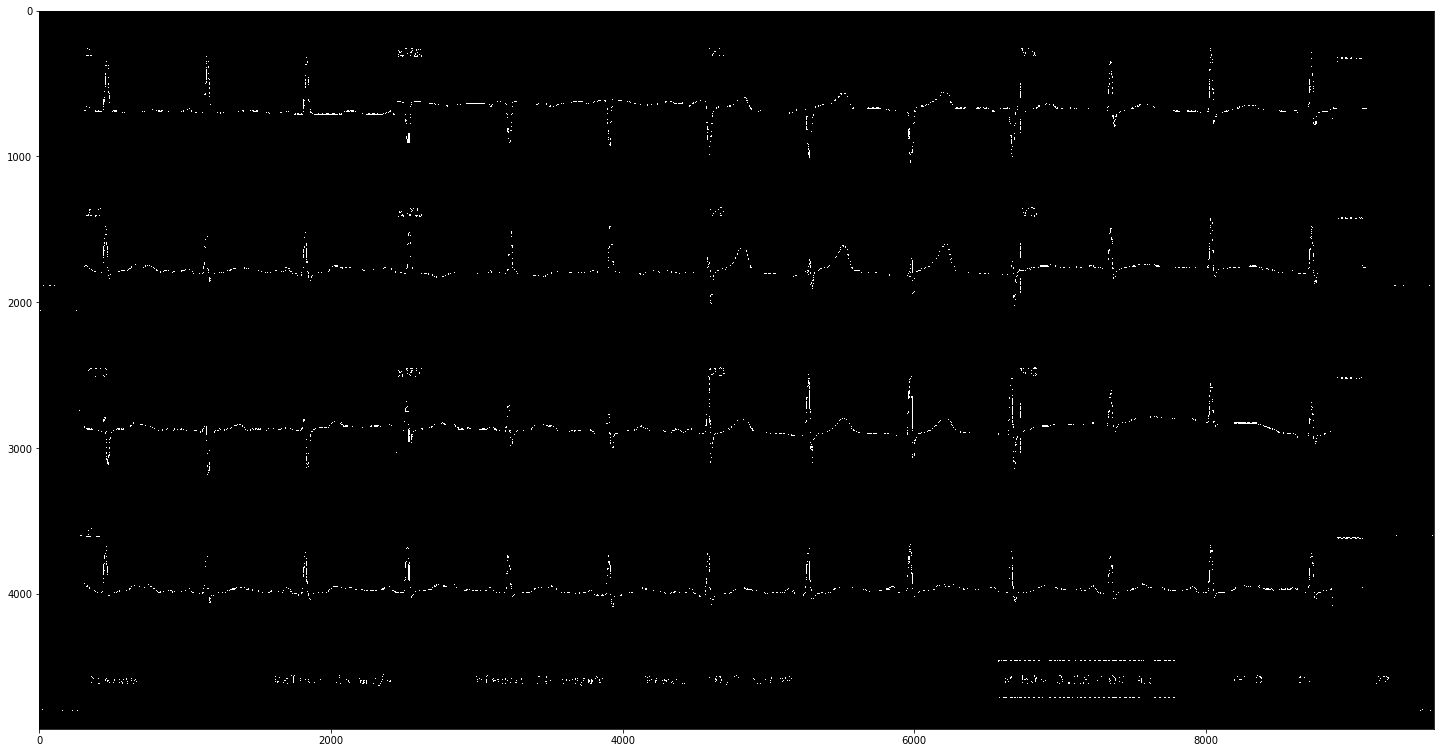

In [3]:
with open('./Data/ECG_001_TH.pkl', 'rb') as input_file:
    ECG_thin = pkl.load(input_file)

_ = plt.imshow(
    ECG_thin,
    cmap='gray'
)

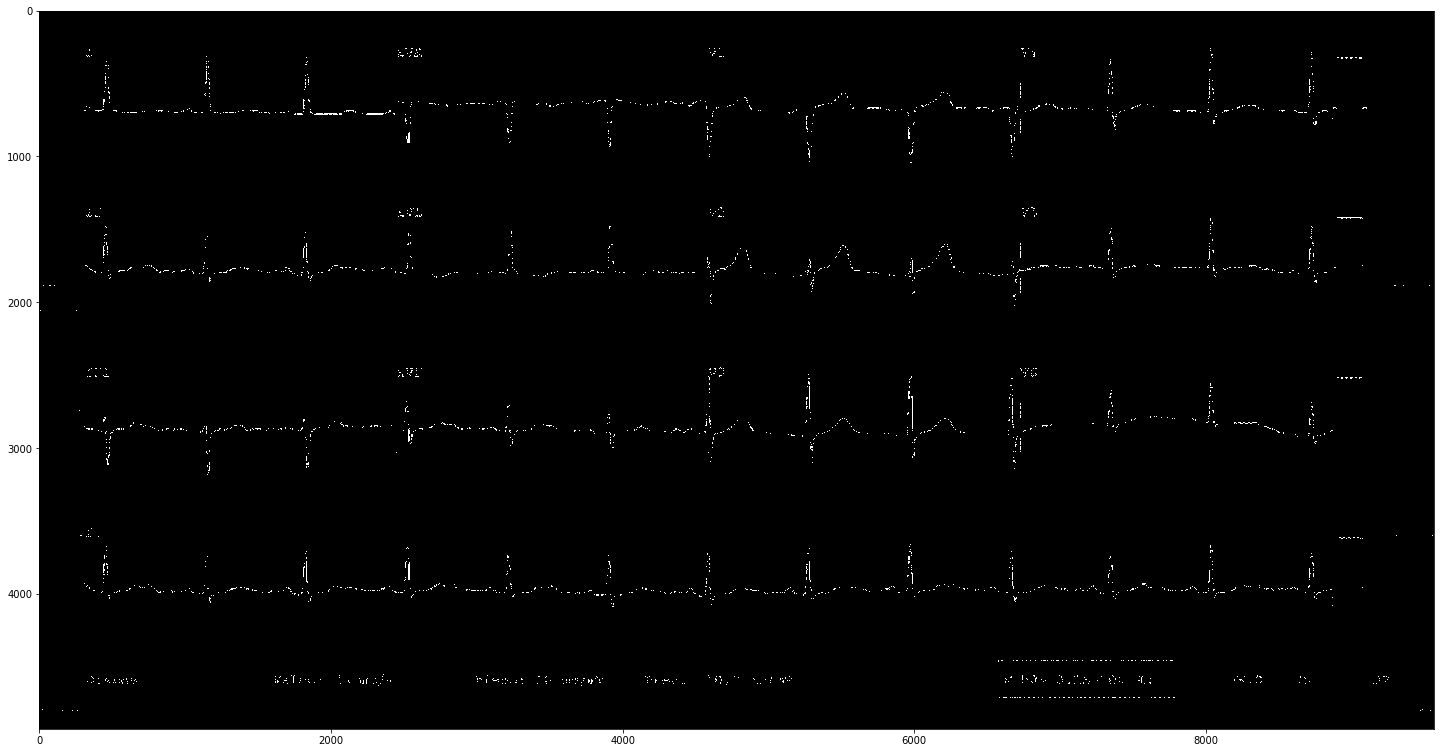

In [4]:
with open('./Data/ECG_001_SK.pkl', 'rb') as input_file:
    ECG_skel = pkl.load(input_file)

_ = plt.imshow(
    ECG_skel,
    cmap='gray'
)

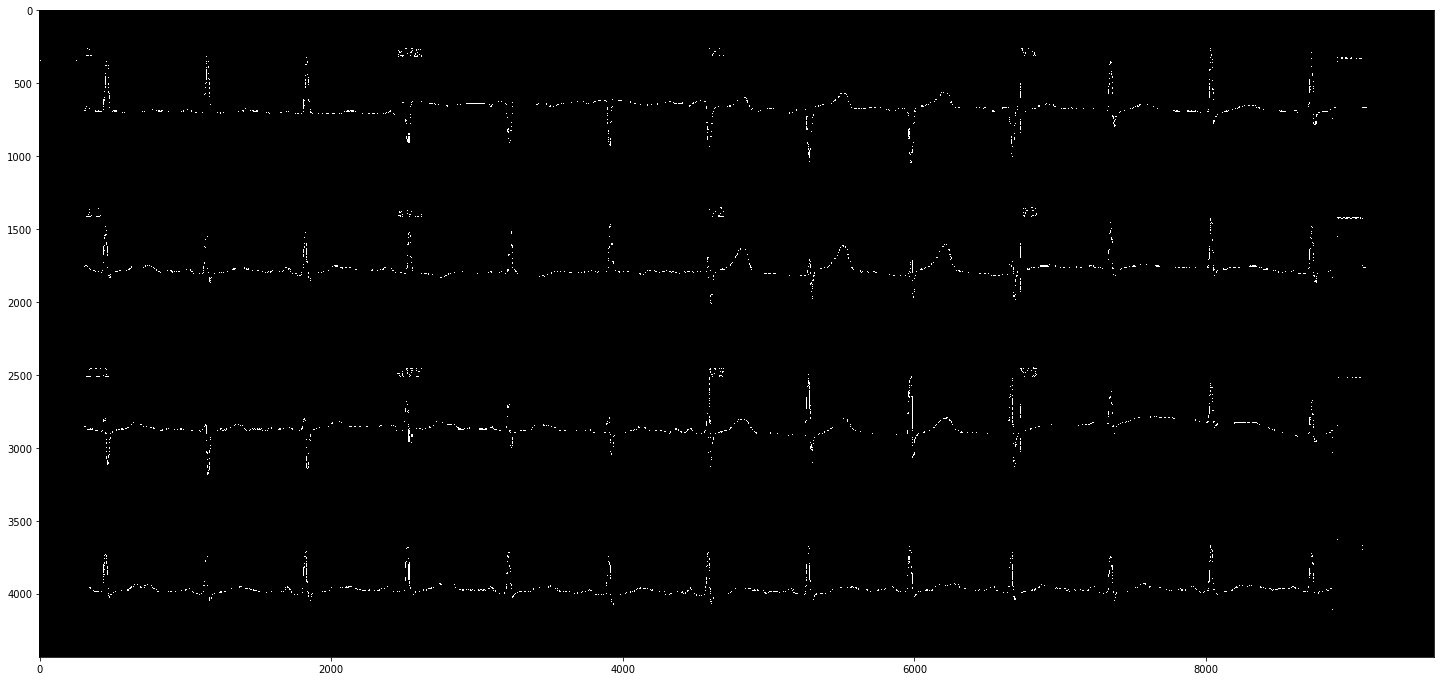

In [5]:
height, _ = ECG_thin.shape
data_crop = int(height * 0.1)

ECG_no_data_thin = ECG_thin[:height-data_crop, :]

_ = plt.imshow(
    ECG_no_data_thin,
    cmap='gray'
)

## I, aVr, V1, V4 

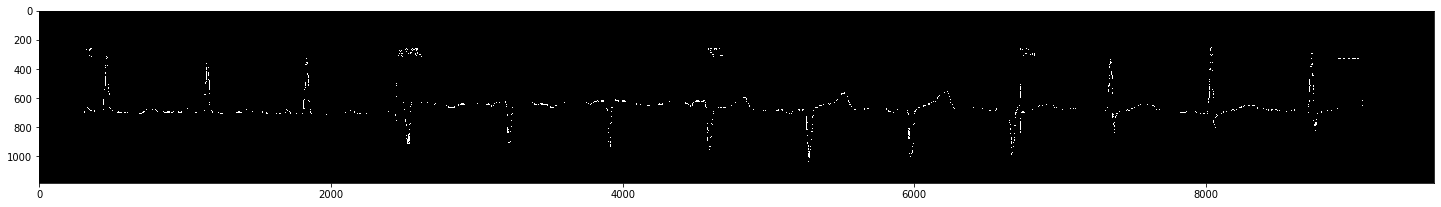

In [6]:
height, _ = ECG_thin.shape
crop = int(height/4) - 50

ECG_thin_I_row = ECG_no_data_thin[:crop, :]

_ = plt.imshow(
    ECG_thin_I_row,
    cmap='gray'
)

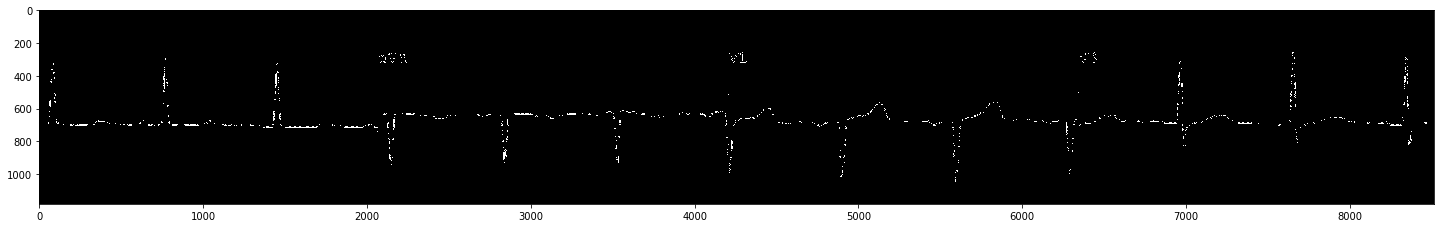

In [7]:
_, width = ECG_thin_I_row.shape
left_side_crop = int(width * 0.04)
right_side_crop = width - int(width * 0.07)

ECG_thin_I_row_crop = ECG_thin_I_row[:, left_side_crop:right_side_crop]

_ = plt.imshow(
    ECG_thin_I_row_crop,
    cmap='gray'
)

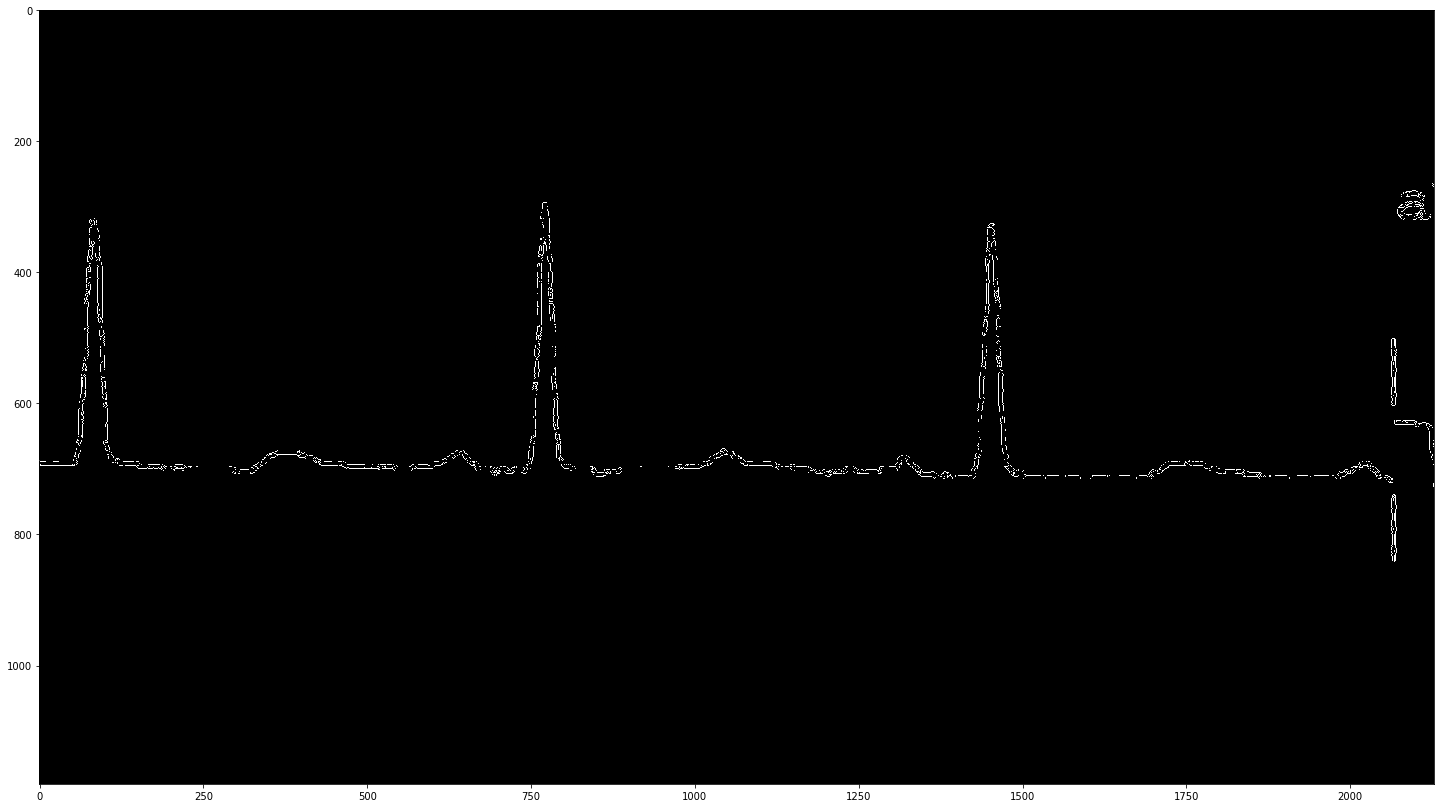

In [8]:
_, width = ECG_thin_I_row_crop.shape
split_crop = int(width / 4)

ECG_I = ECG_thin_I_row_crop[:, 0:split_crop]

_ = plt.imshow(
    ECG_I,
    cmap='gray'
)

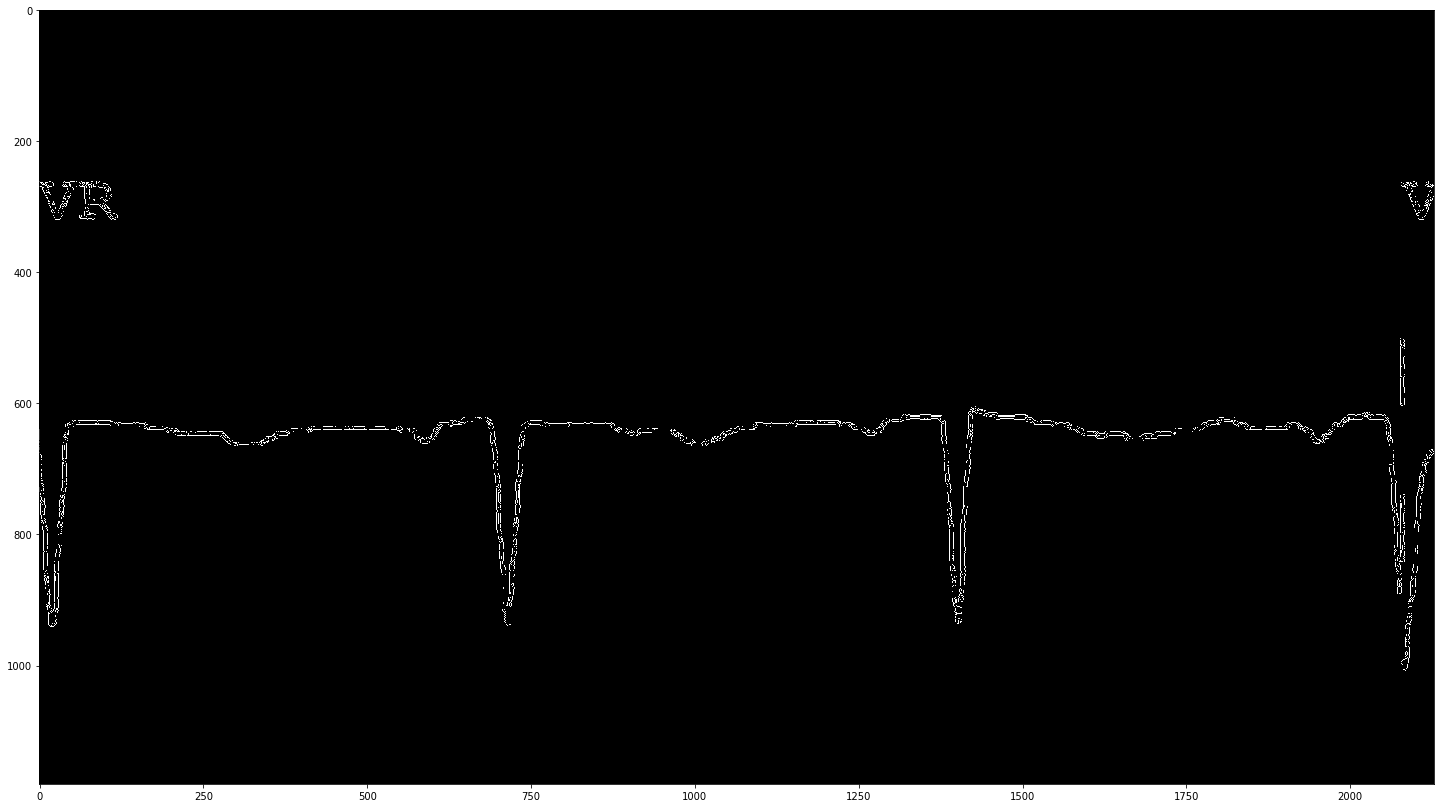

In [9]:
ECG_aVR = ECG_thin_I_row_crop[:, split_crop:2*split_crop]

_ = plt.imshow(
    ECG_aVR,
    cmap='gray'
)

## II, aVl, V2, V5

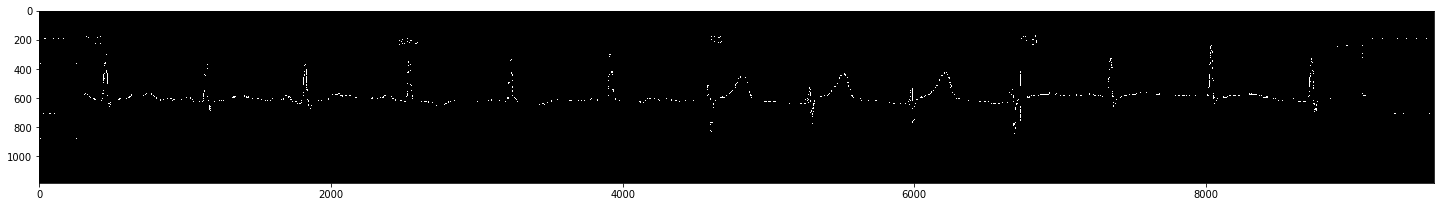

In [10]:
ECG_thin_II_row = ECG_no_data_thin[crop:2*crop, :]

_= plt.imshow(
    ECG_thin_II_row,
    cmap='gray'
)

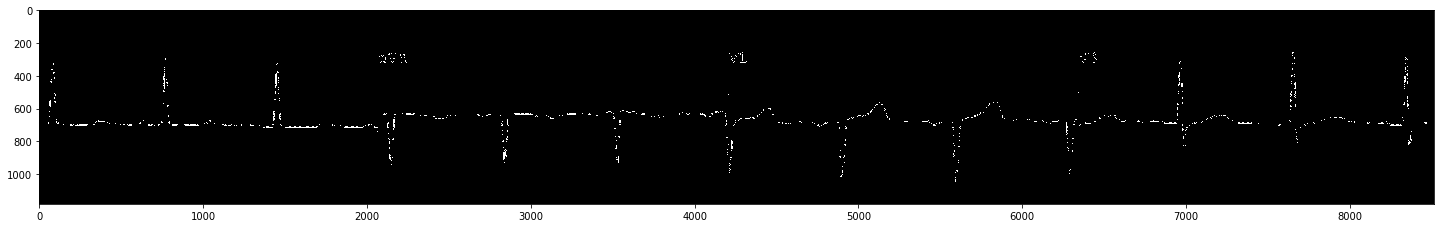

In [11]:
_, width = ECG_thin_I_row.shape
left_side_crop = int(width * 0.04)
right_side_crop = width - int(width * 0.07)

ECG_thin_II_row_crop = ECG_thin_II_row[:, left_side_crop:right_side_crop]

_ = plt.imshow(
    ECG_thin_I_row_crop,
    cmap='gray'
)

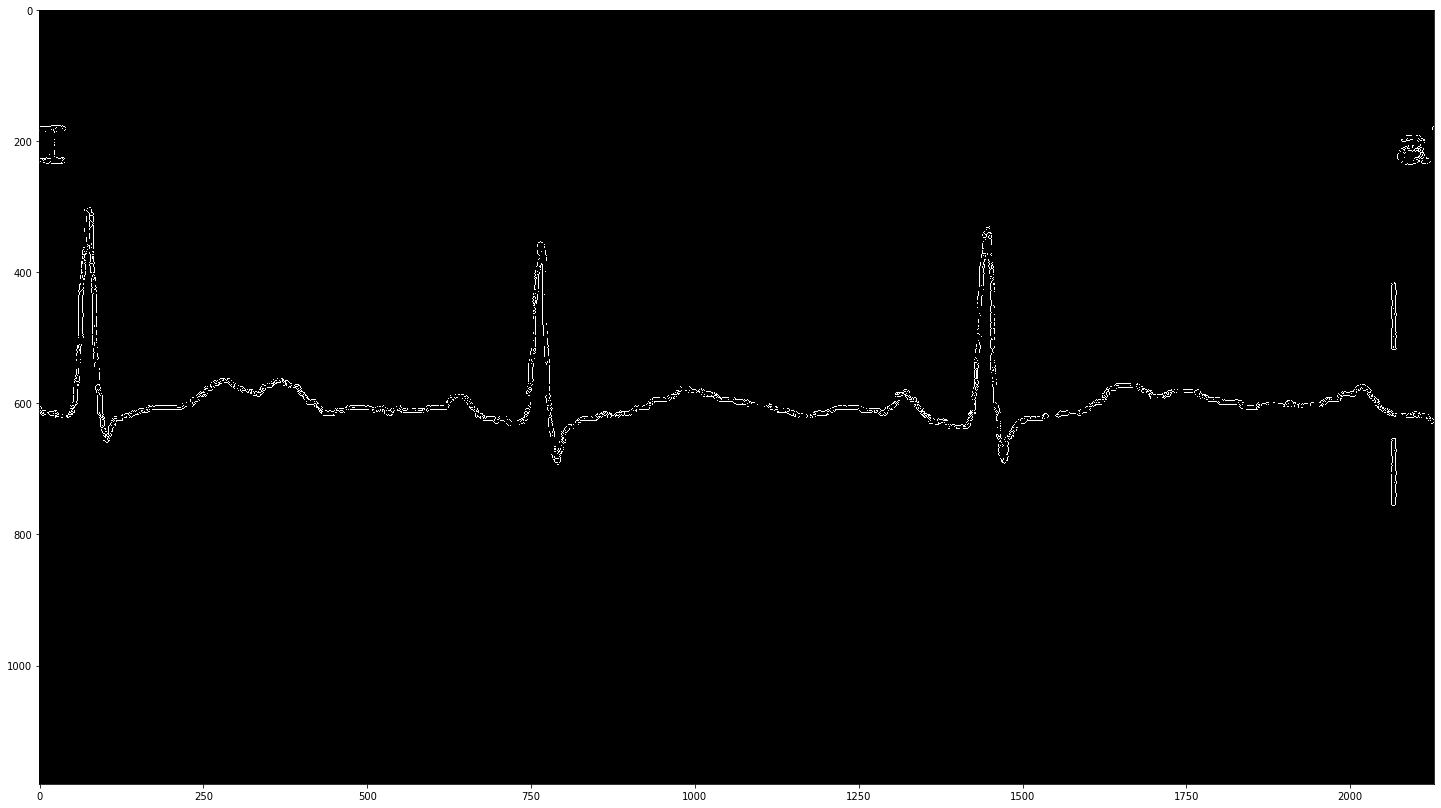

In [12]:
_, width = ECG_thin_II_row_crop.shape
split_crop = int(width / 4)

ECG_II = ECG_thin_II_row_crop[:, 0:split_crop]

_ = plt.imshow(
    ECG_II,
    cmap='gray'
)

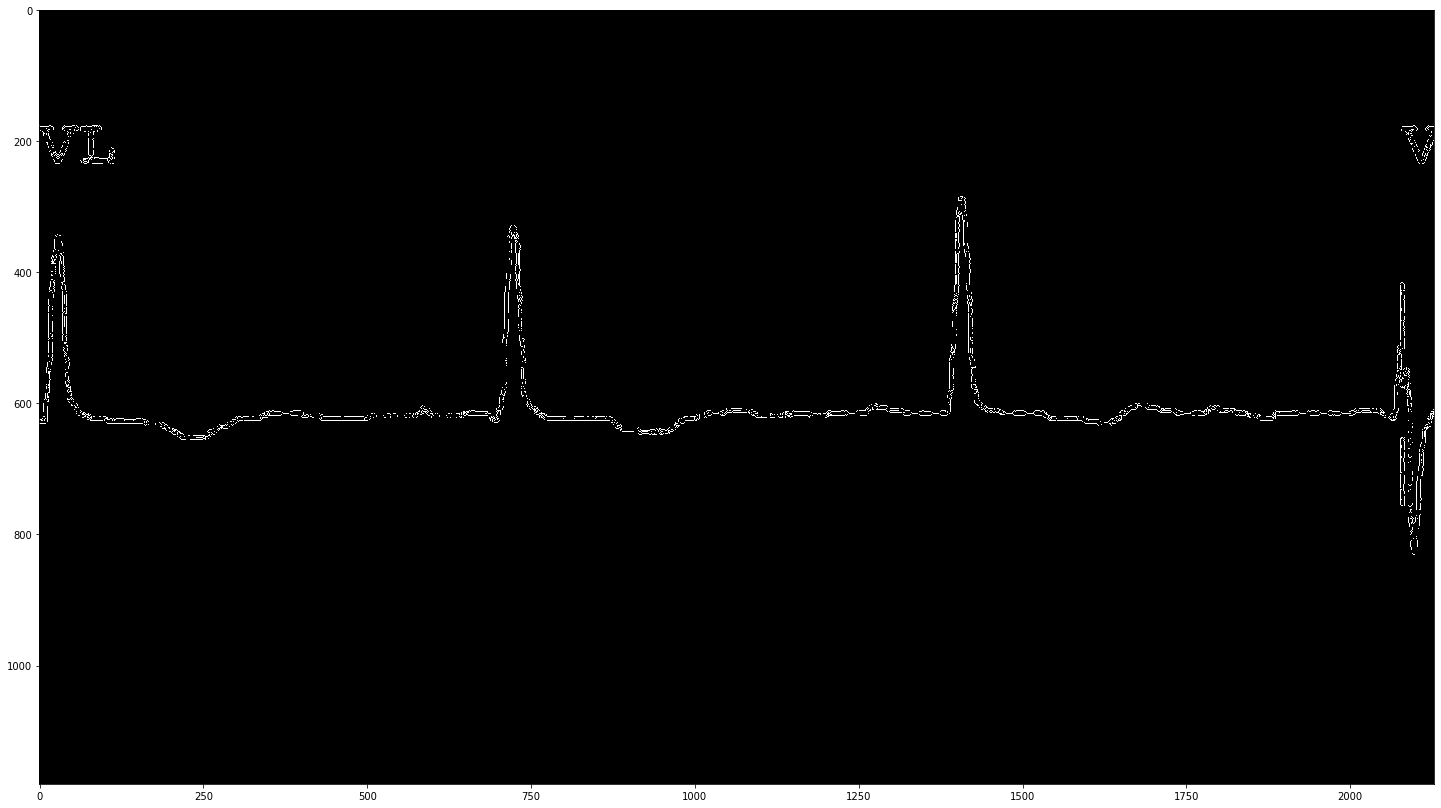

In [13]:
ECG_aVL = ECG_thin_II_row_crop[:, split_crop:2*split_crop]

_ = plt.imshow(
    ECG_aVL,
    cmap='gray'
)

## III, aVf, V3, V6

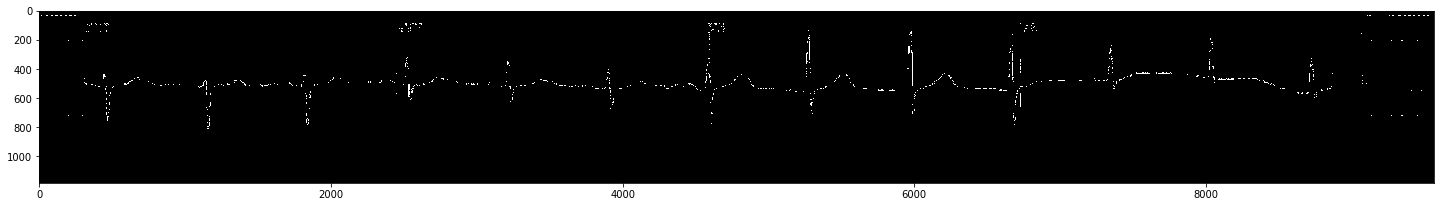

In [14]:
ECG_thin_III_row = ECG_no_data_thin[2*crop:3*crop, :]

_= plt.imshow(
    ECG_thin_III_row,
    cmap='gray'
)

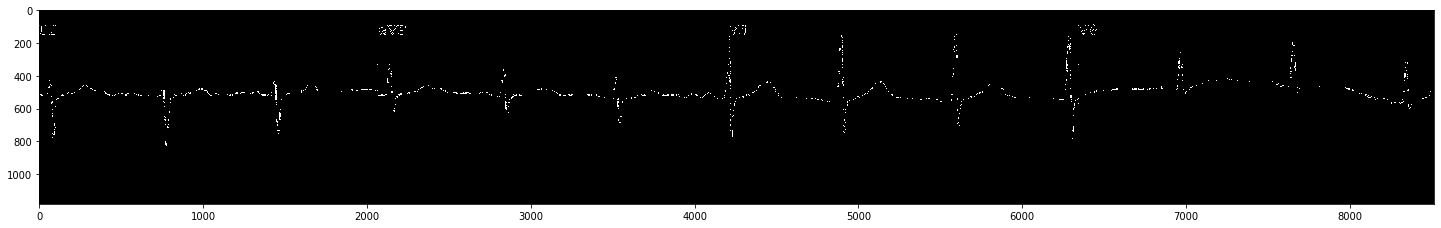

In [15]:
_, width = ECG_thin_III_row.shape
left_side_crop = int(width * 0.04)
right_side_crop = width - int(width * 0.07)

ECG_thin_III_row_crop = ECG_thin_III_row[:, left_side_crop:right_side_crop]

_ = plt.imshow(
    ECG_thin_III_row_crop,
    cmap='gray'
)

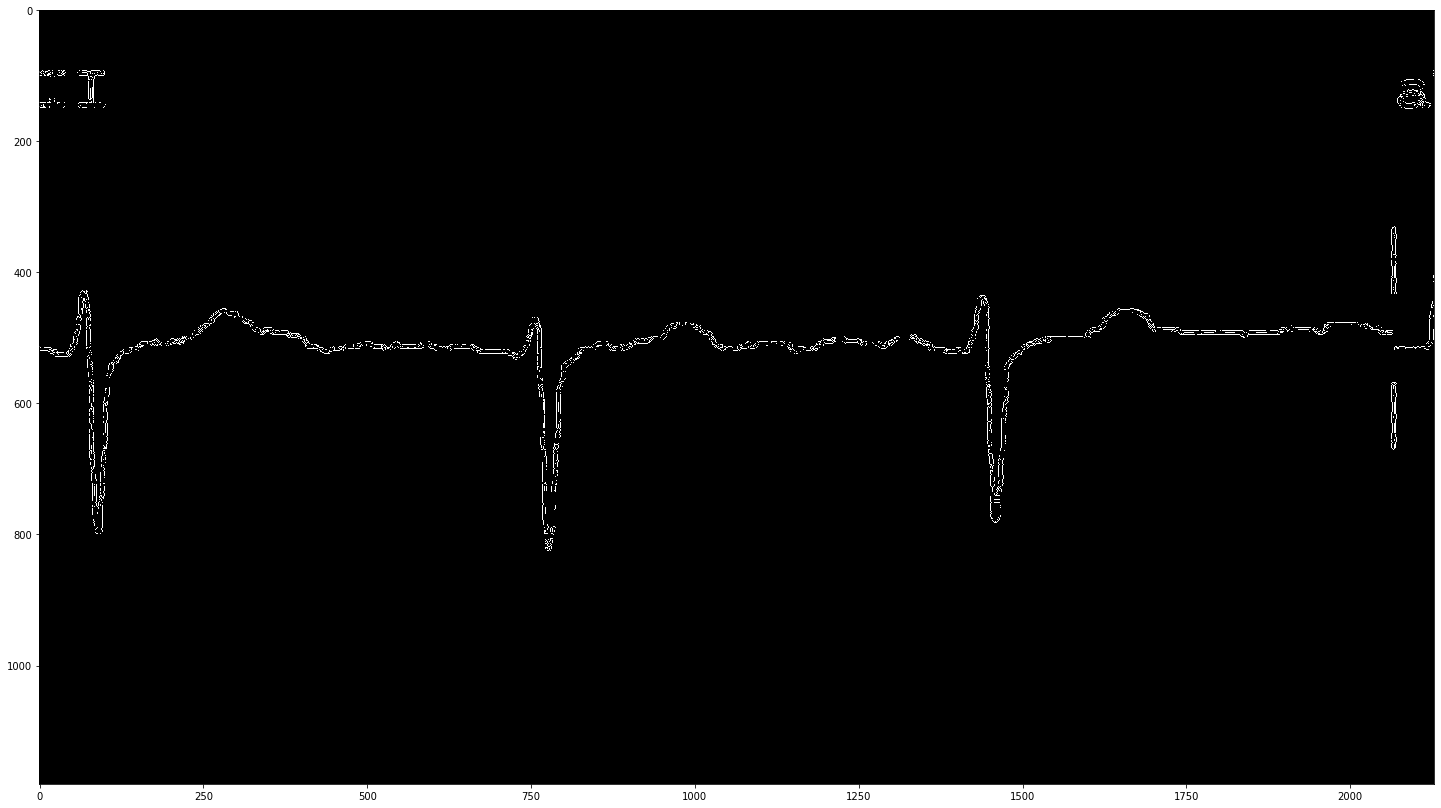

In [16]:
_, width = ECG_thin_III_row_crop.shape
split_crop = int(width / 4)

ECG_II = ECG_thin_III_row_crop[:, 0:split_crop]

_ = plt.imshow(
    ECG_II,
    cmap='gray'
)

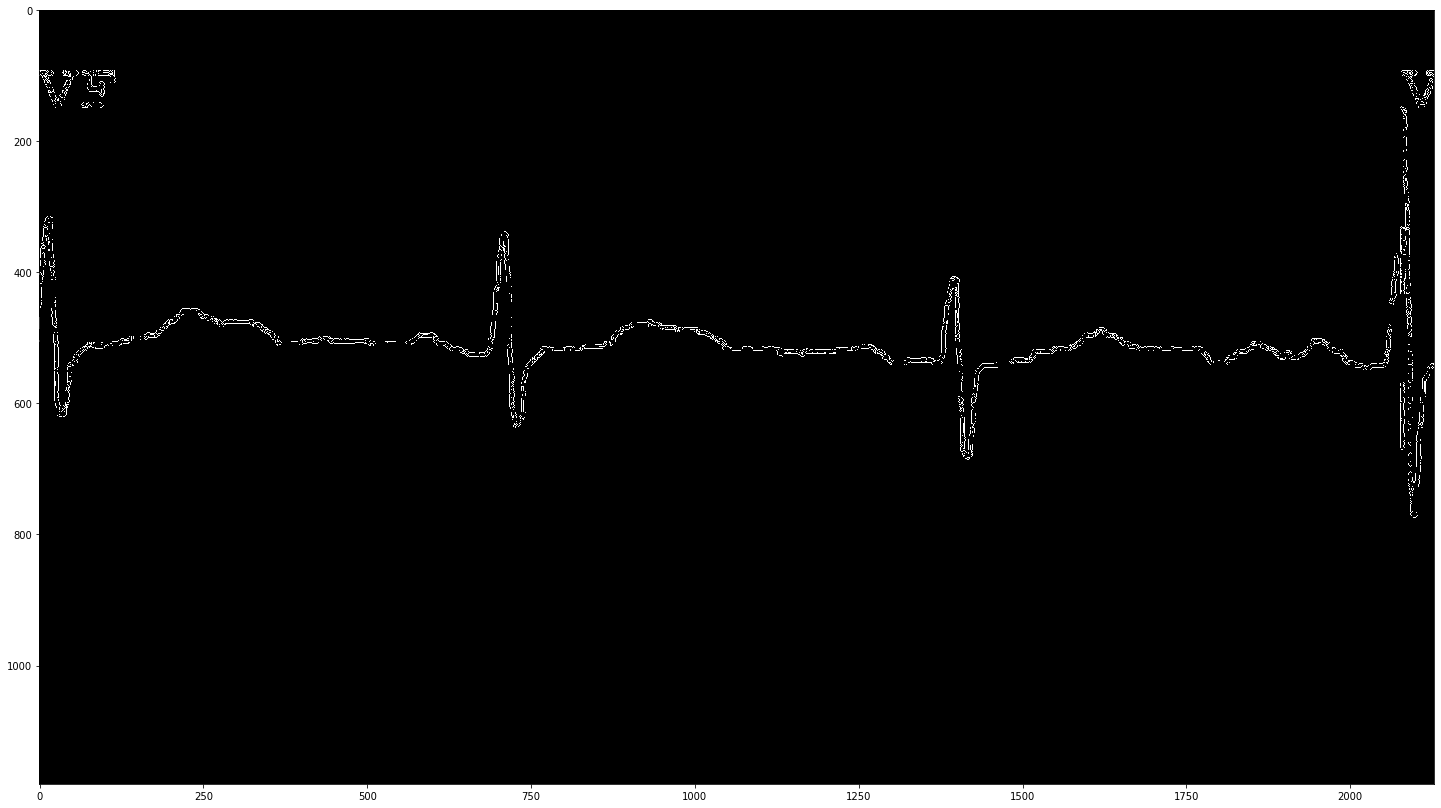

In [17]:
ECG_aVF = ECG_thin_III_row_crop[:, split_crop:2*split_crop]

_ = plt.imshow(
    ECG_aVF,
    cmap='gray'
)

## II

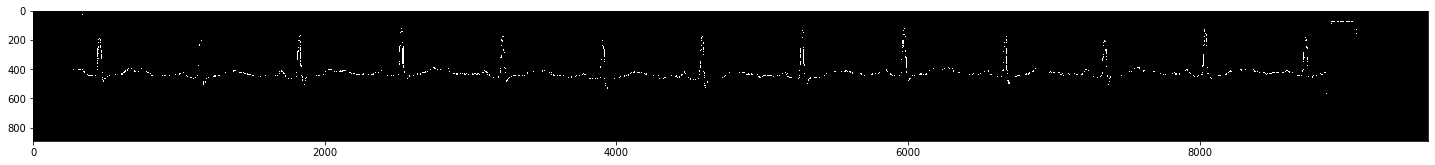

In [18]:
ECG_thin_IV = ECG_no_data_thin[3*crop:, :]

_ = plt.imshow(
    ECG_thin_IV,
    cmap='gray'
)

In [19]:
def filter_lead(lead):
    ECG_pure = np.zeros(lead.shape)

    ECG_points = pd.DataFrame(
        np.dstack(np.nonzero(ECG_pure))[0]
    )

    ECG_points = ECG_points.groupby(1) \
                           .min() \
                           .reset_index() \
                           .values \
                           .T

    ECG_points[(
        ECG_points[1], 
        ECG_points[0]
    )] = 1

    ECG_pure = ECG_points[:, 60:3000]

    _ = plt.imshow(
        ECG_thin_IV_pure,
        cmap='gray'
    )
    
    return ECG_pure

In [20]:
filter_lead(ECG_I)

NameError: name 'ECG_thin_IV_pure' is not defined

In [ ]:
ECG_thin_IV_pure_points = np.nonzero(ECG_thin_IV_pure)

ECG_thin_IV_pure_inter = interpolate.interp1d(ECG_thin_IV_pure_points[1], ECG_thin_IV_pure_points[0], kind='quadratic')

ECG_thin_IV_pure_data = ECG_thin_IV_pure_inter(np.arange(500, 1500, 0.01))

_ = plt.plot(np.arange(500, 1500, 0.01), (ECG_thin_IV_pure_data * -1) + (ECG_thin_IV_pure_data.mean()), '-')